# 밑바닥부터 시작하는 데이터 과학

- 원서명 : Data Science from Scratch: First Principles with Python
- 지은이 : Joel Grus
- 원서 : <http://shop.oreilly.com/product/0636920033400.do>
- 번역서 : <http://www.insightbook.co.kr/books/programming-insight>

![책표지](./image/cover.png)

- 출판사 예제코드 : <https://github.com/insight-book/data-science-from-scratch>

위 책을 보면서 필자가 직접 코딩하면서 정리한 내용입니다.  
책의 모든 내용을 다 포함하고 있지는 않으며, 책에 없는 부가적인 설명이 들어 갈 수 있습니다.  
필자가 작성한 `Jupyter notebook`은 다음 Link에서 다운로드하여 실행이 가능합니다.

- 본문 Jupyter notebook : <https://github.com/DevStarSJ/Study/tree/master/Blog/Python/DataScienceFromScratch>

## 03 데이터 시각화

### 1 matplotlib

가장 단순하게 사용이 가능하게 `막대 그래프`, `선 그래프`, `산점도`를 그릴 수 있는 도구입니다.

#### 1.1 선 그래프

In [2]:
%matplotlib inline
import seaborn

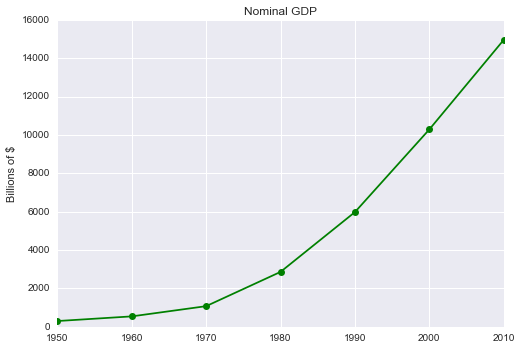

In [7]:
from matplotlib import pyplot as plt

year = list(range(1950, 2011,10))
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(year, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.ylabel("Billions of $")
plt.show()

여러 개의 `Series`를 한 그래프에서 보면 어떤 경향을 볼 수 있다던지, 값을 비교할 때 편리합니다.

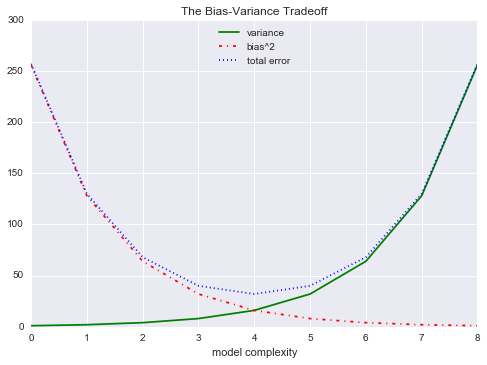

In [18]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i,_ in enumerate(variance)]

plt.plot(xs, variance, 'g-', label='variance')
plt.plot(xs, bias_squared, 'r-.', label='bias^2')
plt.plot(xs, total_error, 'b:', label='total error')

plt.legend(loc=9) #top center
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

#### 1.2 막대 그래프

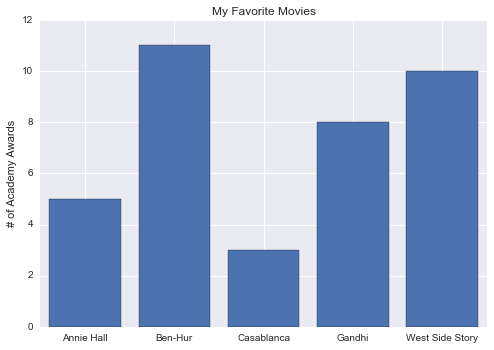

In [8]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

xs = [i + 0.1 for i, _ in enumerate(movies)]

plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

- `xs`를 `index + 0.1`씩 더한 이유는 막대 그래프가 `x=0` 에서 0.1 만큼 떨어져서 그리게 하기 위함입니다.
- 그래프의 x축 위치는 `xs`이며 높이는 `num_oscars`입니다.
- `x 레이블`을 `index + 0.5`에 위치에 `movies`값으로 출력합니다.

`막대 그래프`를 이용해서 `히스토그램`을 그릴수 있습니다.
히스토그램이란 정해진 구간에 해당되는 항목의 개수를 보여줌으로써 값의 분포를 관찰할 수 있는 그래프 형태입니다.

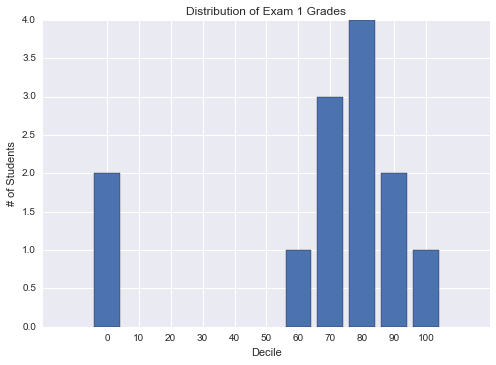

In [11]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
decile = lambda grade: grade // 10 * 10

histogram = Counter(decile(grade) for grade in grades)
plt.bar([x - 4 for x in histogram.keys()], histogram.values(), 8)

plt.xticks([10 * i for i in range(11)])
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

- `xtick`값이 10단위로 구분되어 있습니다.
- `xs`를 `Counter.Keys() 값 - 4`로 했습니다. 
- 각 `xtick` 값을 중심에 보이도록 하기 위해서 -4만큼 이동하였습니다.

만약 y축 값이 500, 505가 있는 경우 축의 범위(`axis`)를 잘못 설정하면 큰 차이가 없어 보이므로 주의해야 합니다.
`matplotlib`의 경우 별도로 설정하지 않으면 두 개의 값이 큰 차이가 나게 보여집니다.
이 것은 각 시각화툴별로 기본설정값이 다르므로 필요한 경우에는 `axis`값을 직접 입력해 주는게 좋습니다. 
왜냐면 기본적으로 y축 값의 최소값과 최대값을 기준으로 `axis`영역을 설정하기 때문입니다.

- `axis([x최소값, x최대값, y최소값, y최대값])`

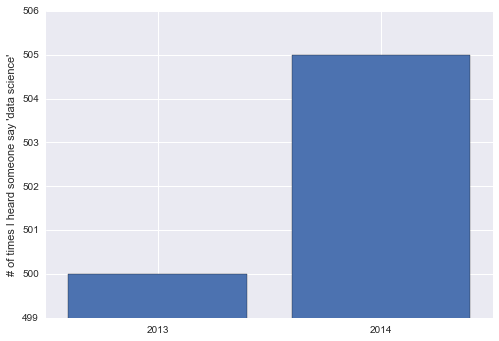

In [13]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

plt.axis([2012.5, 2014.5, 499, 506])

plt.ticklabel_format(useOffset=False)
plt.show()

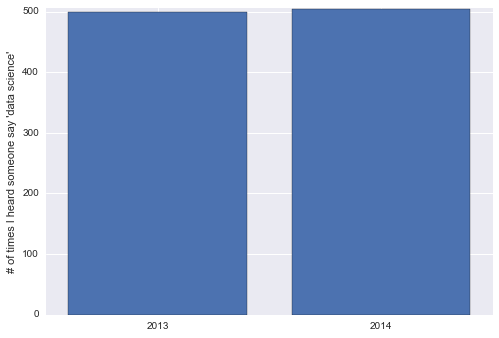

In [14]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

plt.axis([2012.5, 2014.5, 0, 506])

plt.ticklabel_format(useOffset=False)
plt.show()

#### 1.3 선 그래프 (여러개의 시리즈를 한 차트에 그리기)